<a href="https://colab.research.google.com/github/saak1234/AI_CS307/blob/master/Week7/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def binary_bandit(out):
    return int(random.random() < out)

class Bandit:
    def __init__(self, N):
        self.N = N

    def actions(self):
        return list(range(self.N))


bandit = Bandit(N=2)

In [11]:
def e_greedy(my_bandit, epsilon, max_iteration, p):
    Q = [0] * my_bandit.N
    count = [0] * my_bandit.N
    r = 0
    R = []
    R_avg = [0]
    max_iter = max_iteration

    for iter in range(1, max_iter):
        if random.random() > epsilon:
            action = Q.index(max(Q)) # Exploit/ Greed
        else:
            action = random.choice(my_bandit.actions()) # Explore

        r = binary_bandit(p[action])
        R.append(r)
        count[action] += 1
        Q[action] += (r - Q[action]) / count[action]
        R_avg.append(R_avg[iter-1] + (r - R_avg[iter-1]) / iter)

    return Q, R_avg, R

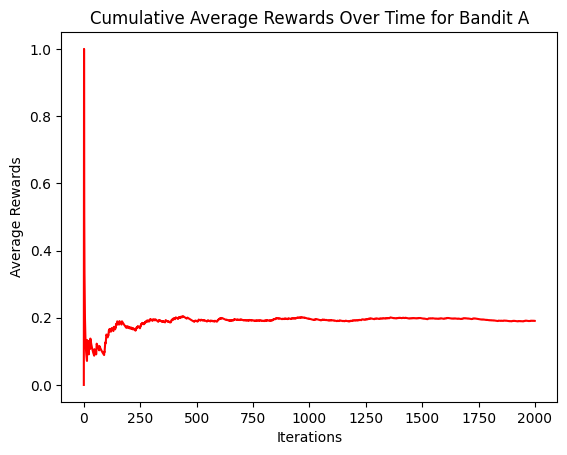

In [22]:
p = [0.1, 0.2]
Q, R_avg, R = e_greedy(bandit, 0.2, 2000, p)
plt.plot(R_avg, color='red')
plt.xlabel("Iterations")
plt.ylabel("Average Rewards")
plt.title("Cumulative Average Rewards Over Time for Bandit A")
plt.show()

Text(0.5, 1.0, 'Cumulative Average Rewards Over Time for Bandit B')

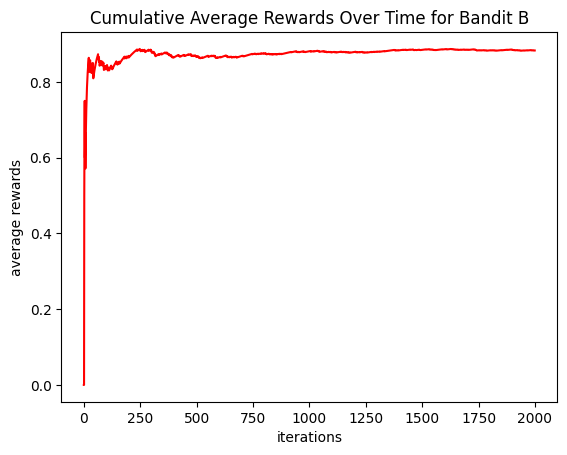

In [23]:
p=[0.8, 0.9]
Q, R_avg, R = e_greedy(bandit, 0.2, 2000,p)
plt.plot(R_avg, color='red')
plt.xlabel("iterations")
plt.ylabel("average rewards")
plt.title("Cumulative Average Rewards Over Time for Bandit B")